In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("support-files/qubit.mplstyle")

twoPi = 2*np.pi
MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}
GHz = 10**9
MHz = 10**6
fF = 10**(-15)
e = 1.6*10**(-19)
kOhm = 10**3
h = 6.64*10**(-34)
Phi0 = h/(2*e)
hbar = h/(2*np.pi)
nH = 10**(-9)
nF = 10**(-9)
kb = 1.38 * 10**(-23)
Rq = h/(4*e*e)
um = 10**(-6)
mF = 10**(-3)
nA = 10**(-9)

<IPython.core.display.Javascript object>


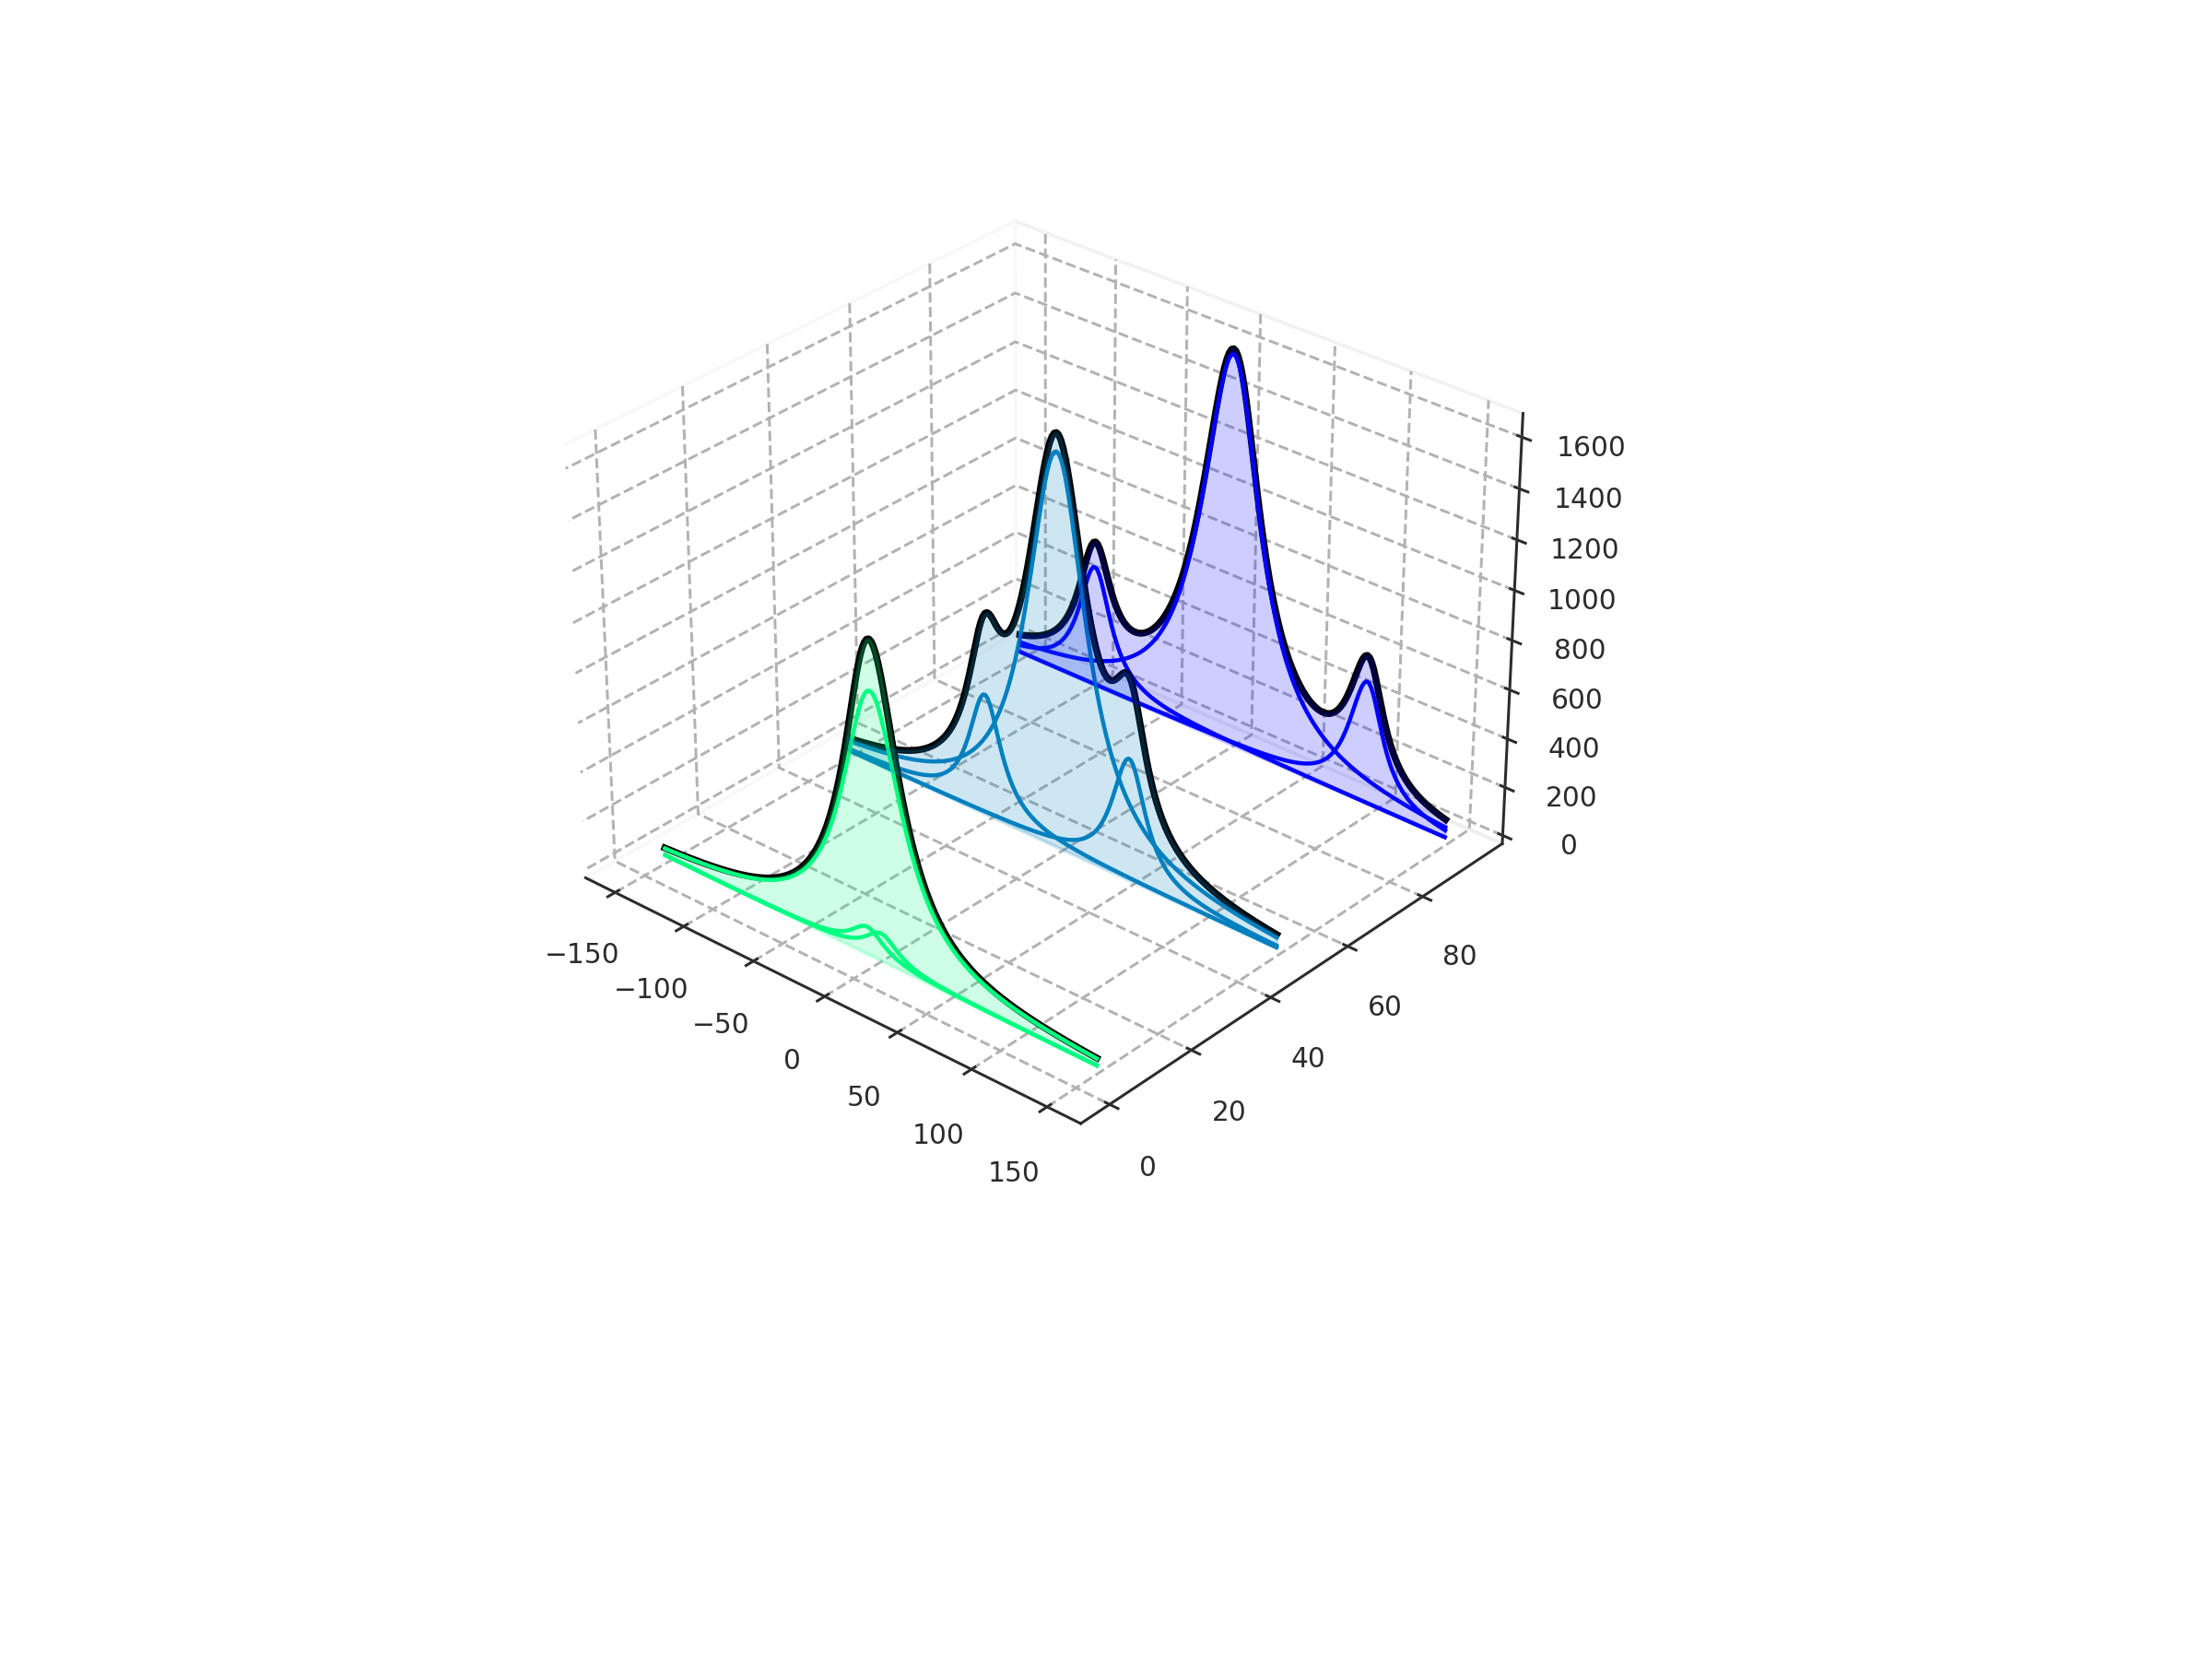

Negative!
Negative!
Negative!
Negative!
Negative!
Negative!


In [8]:
# Everything here evaluated in MHz

def central_kernel(Gamma, Omega):
    Y = np.sqrt(2) * Omega / Gamma
    
    AMPLITUDE = 1 / twoPi * (1/4) * Y**2 / (1 + Y**2) * Gamma
    GAMMASQUARED = Gamma**2
    
    def kernel(dw):
        return AMPLITUDE / (GAMMASQUARED**2 + dw**2)
    return kernel

def side_kernel(Gamma, Omega, one_or_minus_one):
    Y = np.sqrt(2) * Omega / Gamma
    deltaSquare = (Gamma/4)**2 - Omega**2
    
    if (deltaSquare == 0):
        raise RuntimeError("Bad luck!")
    if (deltaSquare > 0):
        print("Positive!")
        delta = np.sqrt(deltaSquare)
        AMPLITUDE = (
            1 / twoPi
            * -1/8 *  Y**2 / (1 + Y**2)**2
            * (1 - Y**2 + one_or_minus_one * (1-5*Y**2) * Gamma/4/delta)
        )
        SHIFT_DW = 0
        GAMMASQUARED = (3*Gamma/4 + one_or_minus_one*delta)**2
    else:
        print("Negative!")
        delta = np.sqrt(-deltaSquare)
        AMPLITUDE = (
            1 / twoPi
            * -1/8 *  Y**2 / (1 + Y**2)**2
            * (1 - Y**2)
        )
        SHIFT_DW = delta*one_or_minus_one
        GAMMASQUARED = (3*Gamma/4)**2
    def kernel(dw):
        return AMPLITUDE / (GAMMASQUARED**2 + (dw-SHIFT_DW)**2)
    return kernel

MHz = 10**6
GHz = 10**9
hbar = 6.64*10**(-34)

omega = 10*10**9
Gamma = 5
# Omega_list = np.array([95, 65, 35, 5])
Omega_list = np.array([95, 50, 5])
# scaler = hbar * omega * Gamma*MHz / 10**(-20)
scaler = Gamma*MHz # to get power / photon energy = photon/s/Hz

dw = np.linspace(-150,150, 201)
to_scale = np.ones(dw.size)

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(projection='3d')
cmap = plt.cm.winter(np.linspace(0, 1, len(Omega_list)))


for i, Omega in enumerate(Omega_list):
    ck = central_kernel(Gamma, Omega)(dw) * scaler
    skl = side_kernel(Gamma, Omega,1)(dw) * scaler
    skr = side_kernel(Gamma, Omega,-1)(dw) * scaler
    total = (skr + skl + ck)
    
    scaled_by_Omega = to_scale*Omega
    
    ax.add_collection3d(plt.fill_between(dw, total, 0, color=cmap[i], alpha=0.1), Omega, zdir='y')
    ax.plot(dw, scaled_by_Omega, total, color='black', linewidth=2)
    ax.plot(dw, scaled_by_Omega, ck, color=cmap[i])
    ax.plot(dw, scaled_by_Omega, skl, color=cmap[i])
    ax.plot(dw, scaled_by_Omega, skr, color=cmap[i])


# ax.zaxis.set_scale('log')

# ax.set_zlim([0, 1.5])
# ax.set_xlabel('Detuning')
# ax.set_zlabel('S($\omega$)')
ax.view_init(azim=-49)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.savefig("./output/incoherent-scattering.svg")

<IPython.core.display.Javascript object>


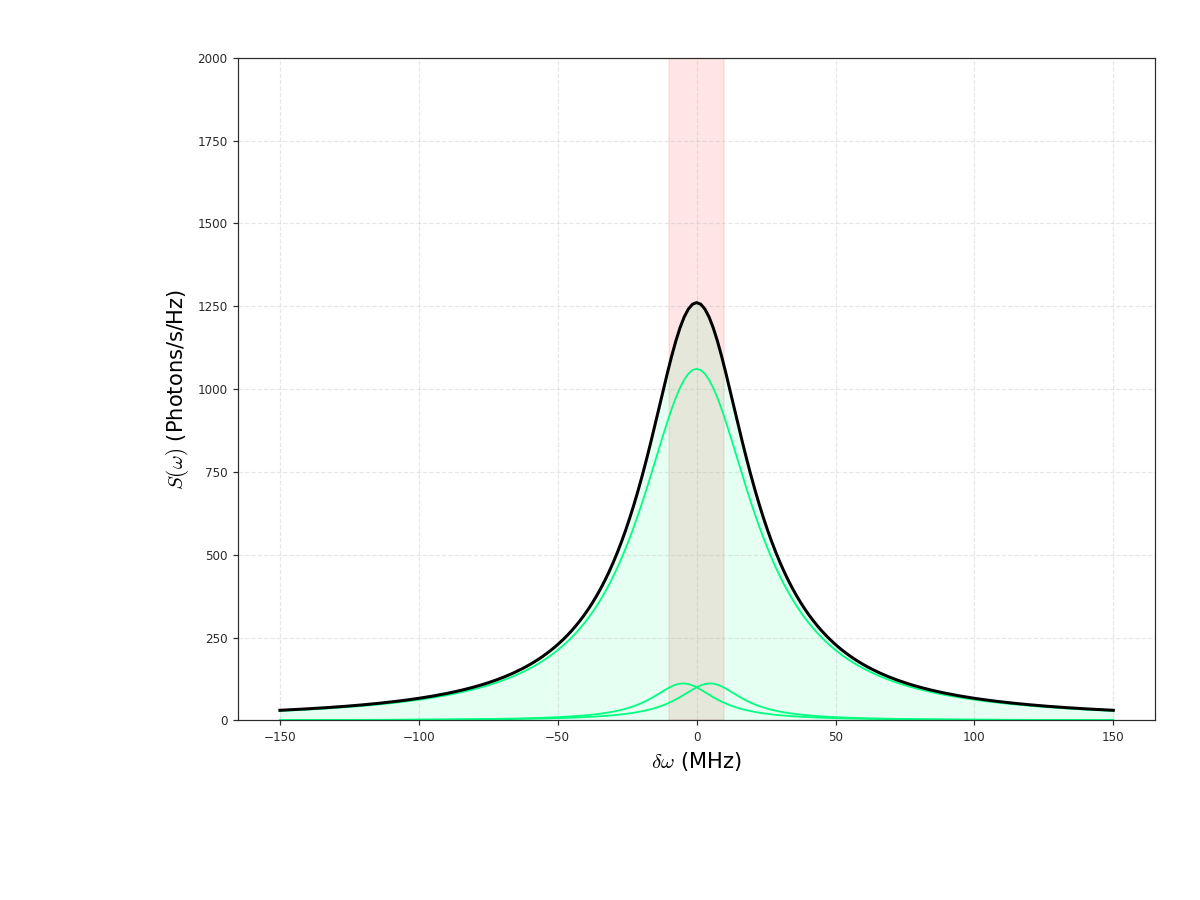

Negative!
Negative!


In [22]:
omega = 10*10**9
Gamma = 5
Omega = 5
# scaler = hbar * omega * Gamma*MHz / 10**(-20)
scaler = Gamma*MHz

Y = np.sqrt(2) * Omega / Gamma    
coherent = 1/2 * Y**2 / (1+Y**2)**2 * scaler
RBW = 20
RBW_axis = np.linspace(-RBW/2, RBW/2)
coherent_amplitude = coherent/RBW * np.ones(RBW_axis.size)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.fill_between(RBW_axis, 0, coherent_amplitude, alpha=0.1, color='red')

ck = central_kernel(Gamma, Omega)(dw) * scaler
skl = side_kernel(Gamma, Omega,1)(dw) * scaler
skr = side_kernel(Gamma, Omega,-1)(dw) * scaler
total = (skr + skl + ck)
    
ax.fill_between(dw, 0, total, color=cmap[-1], alpha=0.1)
ax.plot(dw, ck, color=cmap[-1])
ax.plot(dw, skl, color=cmap[-1])
ax.plot(dw, skr, color=cmap[-1])
ax.plot(dw, total, color='black', linewidth=2)

ax.set_ylim([0,2000])
# ax.set_ylabel("$S(\omega)$ ($10^{-24}$MHz/Hz)")
ax.set_ylabel("$S(\omega)$ (Photons/s/Hz)")
ax.set_xlabel("$\delta\omega$ (MHz)")
plt.tight_layout()
plt.savefig("./output/coherent-incoherent.svg")

<IPython.core.display.Javascript object>


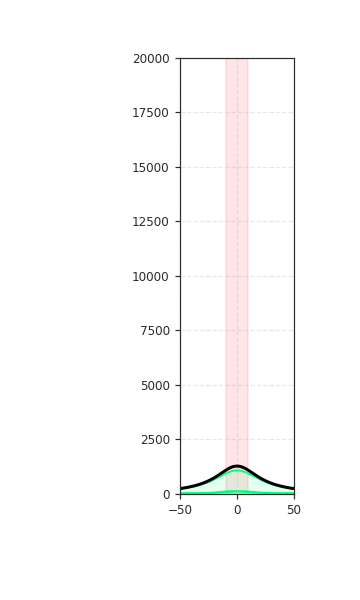

Negative!
Negative!


In [23]:
fig, ax = plt.subplots(1, 1, figsize=(1.2,2))
ax.fill_between(RBW_axis, 0, coherent_amplitude, alpha=0.1, color='red')

ck = central_kernel(Gamma, Omega)(dw) * scaler
skl = side_kernel(Gamma, Omega,1)(dw) * scaler
skr = side_kernel(Gamma, Omega,-1)(dw) * scaler
total = (skr + skl + ck)
    
ax.fill_between(dw, 0, total, color=cmap[-1], alpha=0.1)
ax.plot(dw, ck, color=cmap[-1])
ax.plot(dw, skl, color=cmap[-1])
ax.plot(dw, skr, color=cmap[-1])
ax.plot(dw, total, color='black', linewidth=2)

ax.set_ylim([0,20000])
ax.set_xlim([-50,50])
plt.tight_layout()
plt.savefig("./output/coherent-incoherent-zoomed-out.svg")

# Distortion

<IPython.core.display.Javascript object>


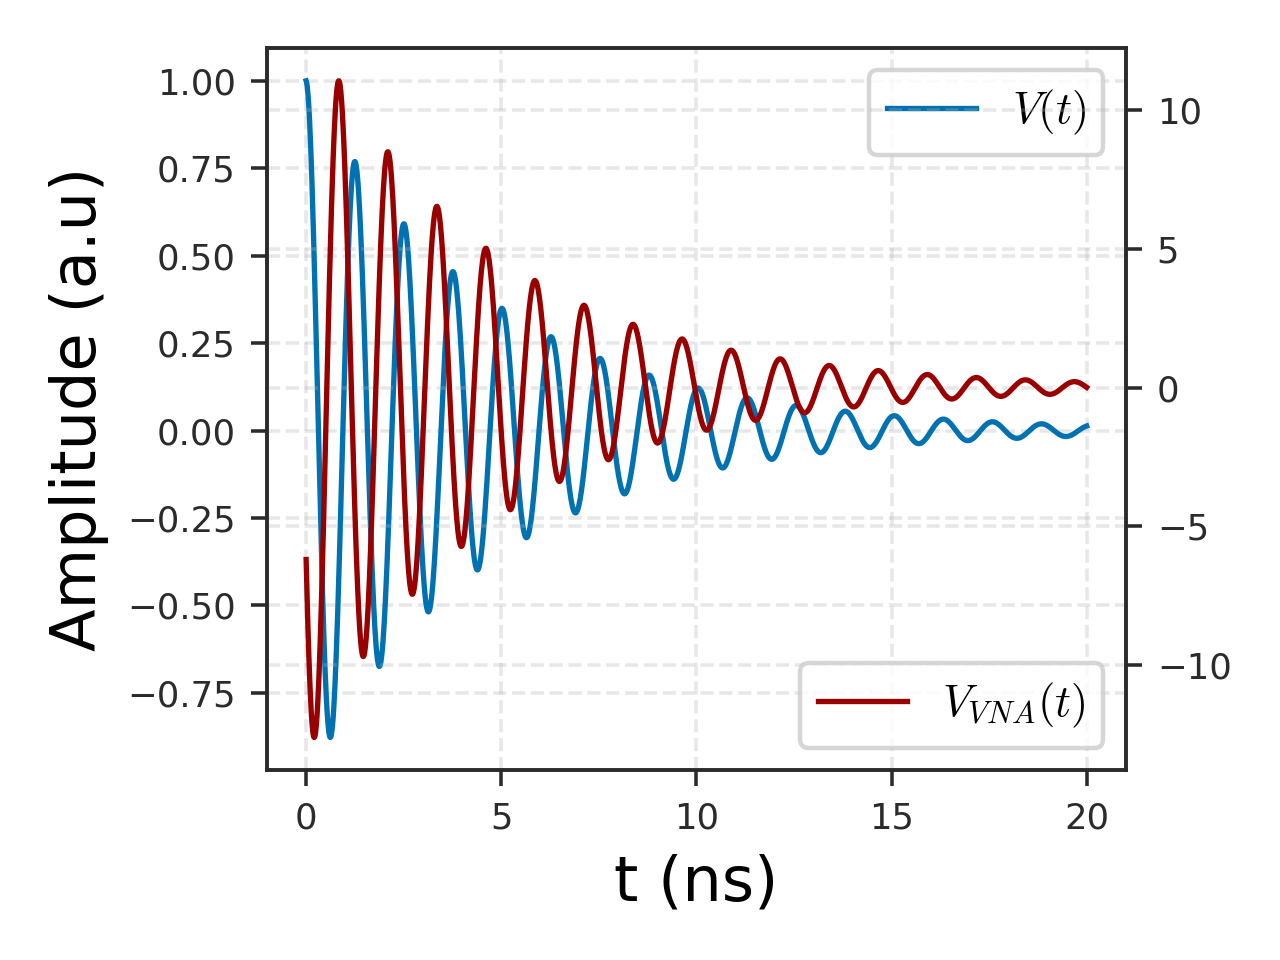

In [23]:
DATA = np.loadtxt("./data/decayPoints.txt")
DATA2 = np.loadtxt("./data/vnaDecayPoints.txt")


fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.plot(DATA[:,0], DATA[:,1], color="C1", label="$V(t)$")
ax1 = ax.twinx()
ax1.plot(DATA2[:,0], DATA2[:,1], color="C4", label="$V_{VNA}(t)$")

# ax.set_ylim([0,2])
ax.set_ylabel("Amplitude (a.u)")
ax.set_xlabel("t (ns)")
ax.legend(loc='upper right')
ax1.legend(loc='lower right')
plt.tight_layout()
plt.savefig("./output/timing-window-decay.svg")

# Coplanar capacitance

In [44]:
um = 10**(-6)
e0 = 8.85*10**(-12)
er = 11.6
mm = 10**(-3)

w = 1
s = 4*um #gap
l = 20*um #total size
t = 1*mm

C1 = w * e0 * 2/np.pi * np.log(4*l/s)
C2 = w * e0 * (er - 1) / np.pi * np.log(16*(t)/np.pi/s)
C2

2.1348333794328108e-10

# De broglie

In [43]:
e = 1.6*10**(-19)
me = 9*10**(-31)
h = 6.64*10**(-34)

energy = 100*100*e
momentum = np.sqrt(2*me*energy)

h / momentum / 10**(-10)

0.12372909475498832

# Ampltiude

<IPython.core.display.Javascript object>


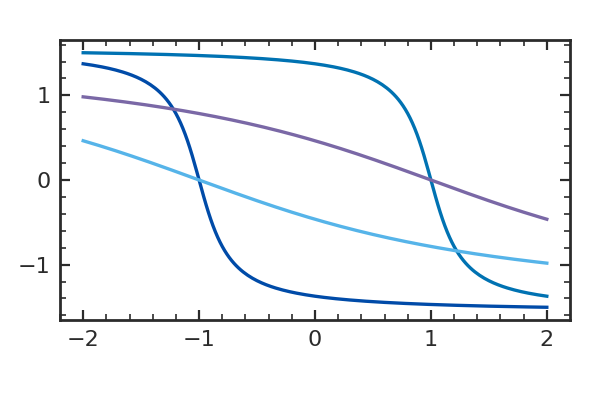

In [5]:
def amplitude(Omega, k, delta, chi):
    return Omega**2 / (
        k**2 + (delta + chi)**2
    )
def phase(Omega, k, delta, chi):
    return np.arctan(-(delta + chi) / k)

detuning = np.linspace(-2, 2, 201)
Omega = 1
k = 0.2
chi = 1

# plt.plot(detuning, amplitude(Omega, k, detuning, chi))
# plt.plot(detuning, amplitude(Omega, k, detuning, 0))
# plt.plot(detuning, amplitude(Omega, k, detuning, -chi))
# plt.savefig("./output/resonator-freq-shift.svg")

plt.plot(detuning, phase(Omega, k, detuning, chi))
plt.plot(detuning, phase(Omega, k, detuning, -chi))
plt.plot(detuning, phase(Omega, k*10, detuning, chi))
plt.plot(detuning, phase(Omega, k*10, detuning, -chi))
# plt.savefig("./output/resonator-phase-shift.svg")

# Qubit-resonator anticrossing
- See `2021-08_cqps_paper` for the formula derivation

In [2]:
def qubit_resonator_spectrum(qubit_f01: list, resonator_f: float, g: float, N: int = 0):
    "See equation (6) above"
    e_high = []
    e_low = []
    print(N)
    for dQubit in qubit_f01:
        a = dQubit / 2
        b = resonator_f * (N + 1/2)
        c = (dQubit - resonator_f) / 2

        factor = np.sqrt(c**2 + g**2*(N+1))
        e_high.append(a+b+factor)
        e_low.append(a+b-factor)

    return (e_low, e_high)


def make_transmission_function(Gamma1: float, GammaPhi: float, kappa: float, g: float):
    """
    Function defined within a function, so that it has seeded parameters for constant parameters

    See mathematica notebook for how this expansion was found.

    Make sure everything is in MHz (or everything is in GHz)
    """
    Gamma = Gamma1/2 + GammaPhi
    kappaPrime = kappa / 2
    twoGSquared = 2*g**2
    twoGammaSquared = 2*Gamma**2
    GammaSquared = Gamma**2
    gSquaredPlusGammaKappaPrimed_allSquared = (g**2 + Gamma*kappaPrime)**2
    kappaPrimeSquared = kappaPrime**2

    def transmission(delta_q: float, delta_r: float) -> float:
        delta_qSquared = delta_q**2
        delta_rSquared = delta_r**2
        # We are interested in the amplitude, so take the square
        return (
#             twoGSquared*delta_q
#             twoGammaSquared*delta_r
#             2*delta_qSquared*delta_r
            (twoGSquared*delta_q - twoGammaSquared*delta_r - 2*delta_qSquared*delta_r)
            / 
            (- twoGSquared*delta_q*delta_r 
             + GammaSquared*delta_rSquared 
             + gSquaredPlusGammaKappaPrimed_allSquared 
             + delta_qSquared*(delta_rSquared + kappaPrimeSquared))
        )
    return transmission

In [3]:
N=401
sweep_f = np.linspace(0, 10, N)
FLUX_NUMBER = np.linspace(0, 1, N)
deltaXMesh, deltaYMesh = np.meshgrid(FLUX_NUMBER, sweep_f)

# Strong coupling, g > k and g >  Gamma
kappa = 0.1
Gamma1 = 0.5
g = 2

# Weak coupling, g > k and g >  Gamma
# kappa = 0.1
# Gamma1 = 4
# g = 2

resonator_f = 5
qubit_f01 = np.linspace(-10,20,N)

# Resonator-qubit
(e_low, e_high) = qubit_resonator_spectrum(
    qubit_f01, resonator_f,
    g)

# For master equation simulation
deltaQ = []
deltaR = []
for fq in qubit_f01:
    a = (np.random.random()-1)*0
    b = (np.random.random()-1)*0
    deltaQ.append(sweep_f - fq + a)
    deltaR.append(sweep_f - resonator_f + b)
deltaQ = np.array(deltaQ)
deltaR = np.array(deltaR)

transmission_function = make_transmission_function(
    Gamma1, 0, kappa, g)
tMesh = transmission_function(deltaQ, deltaR)

tMesh[N//2][119-2:122+2]

0


array([ 3.22692592,  2.62233754,  1.7532304 ,  0.69414317, -0.40062531,
       -1.36284217, -2.08735935])

<IPython.core.display.Javascript object>


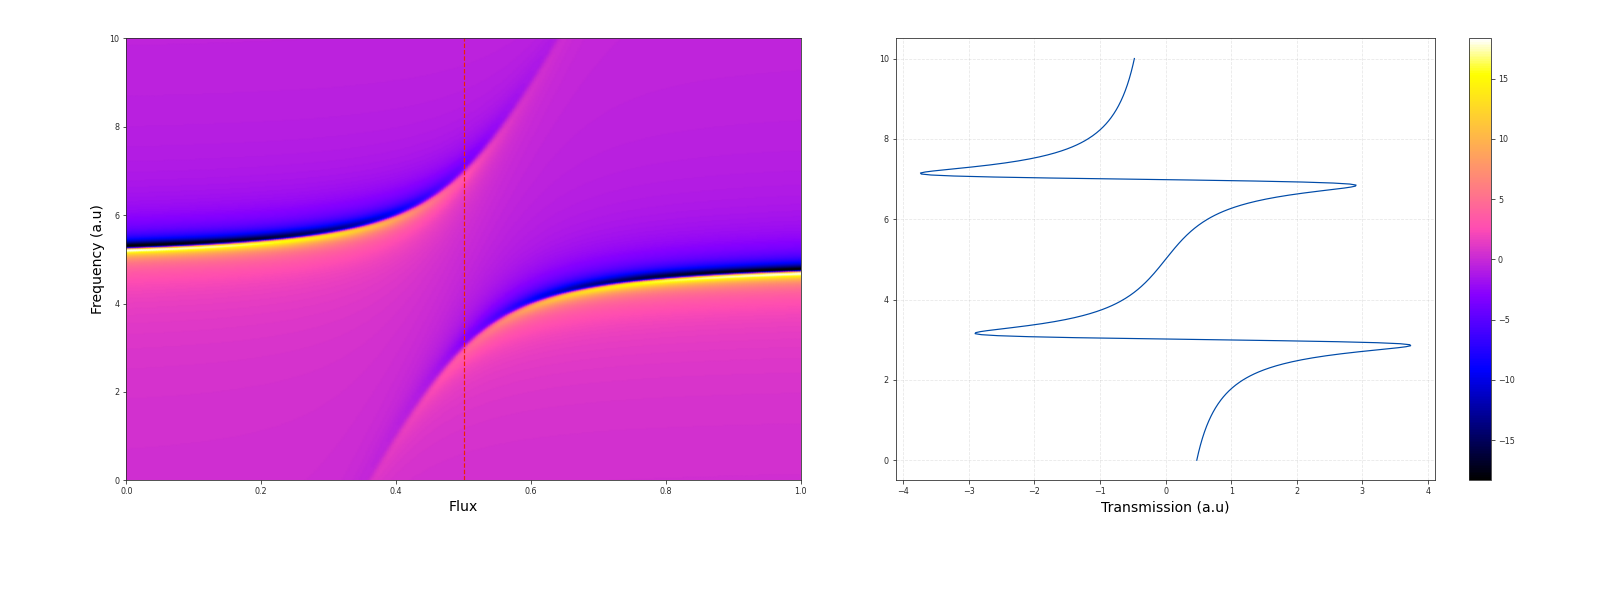

/var/folders/mw/10tz2kz17133xqmvmm1tvmwh0000gn/T/ipykernel_4824/2481345689.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh),
/var/folders/mw/10tz2kz17133xqmvmm1tvmwh0000gn/T/ipykernel_4824/2481345689.py:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im, orientation='vertical')
/var/folders/mw/10tz2kz17133xqmvmm1tvmwh0000gn/T/ipykernel_4824/2481345689.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(im, or

In [4]:
# Plot
# fig, ax_arr = plt.subplots(1, 1, figsize=(4, 3))
# ax = ax_arr
fig, ax_arr = plt.subplots(1, 2, figsize=(8, 3))

ax = ax_arr[0]
im = ax.pcolormesh(deltaXMesh, deltaYMesh, np.transpose(tMesh), 
                   shading='gouraud', cmap=plt.cm.gnuplot2,
             )
ax.axvline(0.5, linestyle='--', color=MY_COLOURS["DarkRed"])
cbar = fig.colorbar(im, orientation='vertical')
ax.set_xlabel("Flux")
ax.set_ylabel("Frequency (a.u)")

# Cross section plot
ax = ax_arr[1]
# tMesh[N//2][119:122] = 10.1
# tMesh[N//2][279:282] = 10.1
# idx = 280
ax.plot(tMesh[N//2], sweep_f)
# ax.scatter(sweep_f[idx], tMesh[N//2][idx], color='red')
ax.set_xlabel("Transmission (a.u)")

plt.tight_layout()
# plt.savefig("strong-coupling.png", dpi=300)
# plt.savefig("weak-coupling.png", dpi=300)
# plt.savefig("other-weak-coupling.png", dpi=300)